In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
pd.set_option('display.max_columns',None)

In [46]:
train_df = pd.read_csv('Train.csv')

In [47]:
test_df = pd.read_csv('Test.csv')

In [48]:
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [49]:
train_df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [50]:
test_df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [51]:
commonIDlist = list(set(train_df["ID"]) & set(test_df["ID"]))
commonIDlist = pd.DataFrame(commonIDlist,columns=["ID"])

In [52]:
commonIDlist= commonIDlist.merge(train_df[['ID','Segmentation']],on="ID",how="left")

In [53]:
commonIDlist

,ID,Segmentation
0,466951,C
1,466954,C
2,466955,A
3,466956,B
4,466961,C
...,...,...
2327,466926,D
2328,466927,D
2329,466936,C
2330,466938,A


In [54]:
train_df.drop('ID',axis=1,inplace=True)
test_df.drop('ID',axis=1,inplace=True)

In [55]:
train_df.loc[train_df['Ever_Married'].isnull(),'Ever_Married'] = np.where(train_df[train_df['Ever_Married'].isnull()]['Family_Size']==1,'No',train_df[train_df['Ever_Married'].isnull()]['Ever_Married'] )
test_df.loc[test_df['Ever_Married'].isnull(),'Ever_Married'] = np.where(test_df[test_df['Ever_Married'].isnull()]['Family_Size']==1,'No',test_df[test_df['Ever_Married'].isnull()]['Ever_Married'] )

In [56]:
train_df.loc[train_df['Ever_Married'].isnull(),'Ever_Married'] = np.where(train_df[train_df['Ever_Married'].isnull()]['Age']<=24,'No','Yes')
test_df.loc[test_df['Ever_Married'].isnull(),'Ever_Married'] = np.where(test_df[test_df['Ever_Married'].isnull()]['Age']<=24,'No','Yes')

In [57]:
train_df.loc[train_df['Graduated'].isnull(),'Graduated'] = np.where(train_df[train_df['Graduated'].isnull()]['Age']<=23,'No',train_df.loc[train_df['Graduated'].isnull(),'Graduated'])
test_df.loc[test_df['Graduated'].isnull(),'Graduated'] = np.where(test_df[test_df['Graduated'].isnull()]['Age']<=23,'No',test_df.loc[test_df['Graduated'].isnull(),'Graduated'])

In [58]:
train_df.loc[train_df['Graduated'].isnull(),'Graduated'] = np.where((train_df[train_df['Graduated'].isnull()]['Profession']=='Entertainment') | (train_df[train_df['Graduated'].isnull()]['Profession']=='Homemaker'),'No','Yes'  )
test_df.loc[test_df['Graduated'].isnull(),'Graduated'] = np.where((test_df[test_df['Graduated'].isnull()]['Profession']=='Entertainment') | (test_df[test_df['Graduated'].isnull()]['Profession']=='Homemaker'),'No','Yes'  )

In [59]:
train_df['Profession'].fillna('Artist',inplace=True)
test_df['Profession'].fillna('Artist',inplace=True)

In [60]:
train_df['Family_Size'] = np.where(train_df['Family_Size']>=6,'Large',train_df['Family_Size'])
test_df['Family_Size'] = np.where(test_df['Family_Size']>=6,'Large',test_df['Family_Size'])

In [61]:
train_df['Family_Size'] = train_df['Family_Size'].astype(str)
test_df['Family_Size'] = test_df['Family_Size'].astype(str)

In [62]:
train_df['Family_Size'] = np.where(train_df['Family_Size']=='1.0','Single',train_df['Family_Size'])
test_df['Family_Size'] = np.where(test_df['Family_Size']=='1.0','Single',test_df['Family_Size'])

In [63]:
train_df['Family_Size'] = np.where((train_df['Family_Size']=='2.0') | (train_df['Family_Size']=='3.0') ,'Small',train_df['Family_Size'])
test_df['Family_Size'] = np.where((test_df['Family_Size']=='2.0') | (test_df['Family_Size']=='3.0') ,'Small',test_df['Family_Size'])

In [64]:
train_df['Family_Size'] = np.where((train_df['Family_Size']=='4.0') | (train_df['Family_Size']=='5.0') ,'Medium',train_df['Family_Size'])
test_df['Family_Size'] = np.where((test_df['Family_Size']=='4.0') | (test_df['Family_Size']=='5.0') ,'Medium',test_df['Family_Size'])

In [65]:
train_df['Family_Size'] = np.where(train_df['Family_Size']=='nan','Small',train_df['Family_Size'])
test_df['Family_Size'] = np.where(test_df['Family_Size']=='nan','Small',test_df['Family_Size'])

In [66]:
train_df.loc[train_df['Var_1'].isnull(),'Var_1'] = np.where(train_df[train_df['Var_1'].isnull()]['Spending_Score']=='Low','Cat_5',train_df[train_df['Var_1'].isnull()]['Var_1'] )
test_df.loc[test_df['Var_1'].isnull(),'Var_1'] = np.where(test_df[test_df['Var_1'].isnull()]['Spending_Score']=='Low','Cat_5',test_df[test_df['Var_1'].isnull()]['Var_1'] )

In [67]:
train_df['Var_1'].fillna('Cat_6',inplace=True)
test_df['Var_1'].fillna('Cat_6',inplace=True)

In [68]:
train_df['Work_Experience'].fillna(0.0,inplace=True)
test_df['Work_Experience'].fillna(0.0,inplace=True)

In [69]:
train_df['Gender'] = np.where(train_df['Gender']=='Male',0,1)
test_df['Gender'] = np.where(test_df['Gender']=='Male',0,1)

train_df['Ever_Married'] = np.where(train_df['Ever_Married']=='Yes',1,0)
test_df['Ever_Married'] = np.where(test_df['Ever_Married']=='Yes',1,0)

train_df['Graduated'] = np.where(train_df['Graduated']=='Yes',1,0)
test_df['Graduated'] = np.where(test_df['Graduated']=='Yes',1,0)


train_df['Spending_Score'] = train_df['Spending_Score'].map({'Low':0 ,'Average':1,'High':2}) 
test_df['Spending_Score'] = test_df['Spending_Score'].map({'Low':0 ,'Average':1,'High':2}) 

train_df['Family_Size'] = train_df['Family_Size'].map({'Single':0 ,'Small':1,'Medium':2,'Large':3})
test_df['Family_Size'] = test_df['Family_Size'].map({'Single':0 ,'Small':1,'Medium':2,'Large':3})


In [71]:
train_df = pd.concat([train_df.drop(['Profession','Var_1'],axis=1),pd.get_dummies(train_df['Profession']),pd.get_dummies(train_df['Var_1'])],axis=1)

In [72]:
test_df = pd.concat([test_df.drop(['Profession','Var_1'],axis=1),pd.get_dummies(test_df['Profession']),pd.get_dummies(test_df['Var_1'])],axis=1)

In [73]:
train_df['Segmentation'] = train_df['Segmentation'].map({'A':0 ,'B':1,'C':2,'D':3})

In [74]:
train_df['Age'] = np.log(train_df['Age'])

In [75]:
train_df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,0,0,3.091042,0,1.0,0,2,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,1,3.637586,1,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1,4.204693,1,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,4.204693,1,0.0,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,1,3.688879,1,0.0,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0,3.091042,0,0.0,0,3,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8064,0,0,3.555348,0,3.0,0,2,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8065,1,0,3.496508,1,1.0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8066,1,0,3.295837,1,1.0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [76]:
test_df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,1,1,36,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,37,1,8.0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,1,69,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,59,0,11.0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,19,0,0.0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,0,0,29,0,9.0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2623,1,0,35,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2624,1,0,53,1,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2625,0,1,47,1,1.0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [77]:
X = train_df.drop('Segmentation',axis=1)
y = train_df['Segmentation']


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44)

In [92]:
from lightgbm import LGBMClassifier

In [93]:
params = {}
params['learning_rate'] = 0.1
params['max_depth'] = 18
params['n_estimators'] = 2000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['colsample_bytree']=1
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1
params['reg_lambda'] = 1

In [94]:
clf = LGBMClassifier(**params)
    
clf.fit(X_train, y_train, early_stopping_rounds=1000, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(y_test, clf.predict(X_test))

print('Eval ACC: {}'.format(eval_score))

[1]	training's multi_error: 0.644407	training's multi_logloss: 1.34175	valid_1's multi_error: 0.645601	valid_1's multi_logloss: 1.34509
Training until validation scores don't improve for 1000 rounds
[2]	training's multi_error: 0.520297	training's multi_logloss: 1.30599	valid_1's multi_error: 0.536555	valid_1's multi_logloss: 1.31335
[3]	training's multi_error: 0.470251	training's multi_logloss: 1.2753	valid_1's multi_error: 0.490706	valid_1's multi_logloss: 1.28609
[4]	training's multi_error: 0.461419	training's multi_logloss: 1.24829	valid_1's multi_error: 0.48513	valid_1's multi_logloss: 1.26318
[5]	training's multi_error: 0.458475	training's multi_logloss: 1.22461	valid_1's multi_error: 0.489467	valid_1's multi_logloss: 1.24224
[6]	training's multi_error: 0.455067	training's multi_logloss: 1.20304	valid_1's multi_error: 0.486369	valid_1's multi_logloss: 1.22363
[7]	training's multi_error: 0.452278	training's multi_logloss: 1.18441	valid_1's multi_error: 0.483891	valid_1's multi_logl

[66]	training's multi_error: 0.392935	training's multi_logloss: 0.938491	valid_1's multi_error: 0.476456	valid_1's multi_logloss: 1.07611
[67]	training's multi_error: 0.39216	training's multi_logloss: 0.937122	valid_1's multi_error: 0.477695	valid_1's multi_logloss: 1.07629
[68]	training's multi_error: 0.391695	training's multi_logloss: 0.935612	valid_1's multi_error: 0.477695	valid_1's multi_logloss: 1.07633
[69]	training's multi_error: 0.390765	training's multi_logloss: 0.934364	valid_1's multi_error: 0.474597	valid_1's multi_logloss: 1.0766
[70]	training's multi_error: 0.389681	training's multi_logloss: 0.932993	valid_1's multi_error: 0.475217	valid_1's multi_logloss: 1.07677
[71]	training's multi_error: 0.389061	training's multi_logloss: 0.931759	valid_1's multi_error: 0.477076	valid_1's multi_logloss: 1.07701
[72]	training's multi_error: 0.388131	training's multi_logloss: 0.930355	valid_1's multi_error: 0.473978	valid_1's multi_logloss: 1.07718
[73]	training's multi_error: 0.38720

[137]	training's multi_error: 0.36365	training's multi_logloss: 0.871725	valid_1's multi_error: 0.482652	valid_1's multi_logloss: 1.09142
[138]	training's multi_error: 0.363341	training's multi_logloss: 0.871079	valid_1's multi_error: 0.482652	valid_1's multi_logloss: 1.09169
[139]	training's multi_error: 0.362256	training's multi_logloss: 0.870348	valid_1's multi_error: 0.482652	valid_1's multi_logloss: 1.09217
[140]	training's multi_error: 0.362876	training's multi_logloss: 0.86978	valid_1's multi_error: 0.483891	valid_1's multi_logloss: 1.09247
[141]	training's multi_error: 0.362256	training's multi_logloss: 0.869113	valid_1's multi_error: 0.483271	valid_1's multi_logloss: 1.09277
[142]	training's multi_error: 0.361791	training's multi_logloss: 0.868396	valid_1's multi_error: 0.483271	valid_1's multi_logloss: 1.09305
[143]	training's multi_error: 0.361791	training's multi_logloss: 0.867744	valid_1's multi_error: 0.483271	valid_1's multi_logloss: 1.09312
[144]	training's multi_error:

[210]	training's multi_error: 0.33793	training's multi_logloss: 0.832791	valid_1's multi_error: 0.484511	valid_1's multi_logloss: 1.10813
[211]	training's multi_error: 0.338085	training's multi_logloss: 0.832365	valid_1's multi_error: 0.48513	valid_1's multi_logloss: 1.10847
[212]	training's multi_error: 0.33855	training's multi_logloss: 0.832004	valid_1's multi_error: 0.48513	valid_1's multi_logloss: 1.10878
[213]	training's multi_error: 0.33886	training's multi_logloss: 0.831518	valid_1's multi_error: 0.48575	valid_1's multi_logloss: 1.10903
[214]	training's multi_error: 0.33886	training's multi_logloss: 0.831016	valid_1's multi_error: 0.487608	valid_1's multi_logloss: 1.10926
[215]	training's multi_error: 0.337775	training's multi_logloss: 0.830494	valid_1's multi_error: 0.488228	valid_1's multi_logloss: 1.10958
[216]	training's multi_error: 0.337465	training's multi_logloss: 0.83003	valid_1's multi_error: 0.490087	valid_1's multi_logloss: 1.10982
[217]	training's multi_error: 0.337

[284]	training's multi_error: 0.323985	training's multi_logloss: 0.808579	valid_1's multi_error: 0.492565	valid_1's multi_logloss: 1.12002
[285]	training's multi_error: 0.32445	training's multi_logloss: 0.808378	valid_1's multi_error: 0.493185	valid_1's multi_logloss: 1.11996
[286]	training's multi_error: 0.323985	training's multi_logloss: 0.808216	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.11995
[287]	training's multi_error: 0.32383	training's multi_logloss: 0.808078	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.12006
[288]	training's multi_error: 0.323985	training's multi_logloss: 0.80784	valid_1's multi_error: 0.493185	valid_1's multi_logloss: 1.11994
[289]	training's multi_error: 0.32352	training's multi_logloss: 0.807601	valid_1's multi_error: 0.492565	valid_1's multi_logloss: 1.12008
[290]	training's multi_error: 0.322901	training's multi_logloss: 0.807362	valid_1's multi_error: 0.493185	valid_1's multi_logloss: 1.12006
[291]	training's multi_error: 0

[357]	training's multi_error: 0.315928	training's multi_logloss: 0.789161	valid_1's multi_error: 0.498141	valid_1's multi_logloss: 1.12755
[358]	training's multi_error: 0.315463	training's multi_logloss: 0.788914	valid_1's multi_error: 0.497522	valid_1's multi_logloss: 1.12773
[359]	training's multi_error: 0.315153	training's multi_logloss: 0.788709	valid_1's multi_error: 0.497522	valid_1's multi_logloss: 1.12794
[360]	training's multi_error: 0.314534	training's multi_logloss: 0.788456	valid_1's multi_error: 0.498141	valid_1's multi_logloss: 1.12799
[361]	training's multi_error: 0.314379	training's multi_logloss: 0.788256	valid_1's multi_error: 0.49938	valid_1's multi_logloss: 1.12817
[362]	training's multi_error: 0.314534	training's multi_logloss: 0.788048	valid_1's multi_error: 0.5	valid_1's multi_logloss: 1.12834
[363]	training's multi_error: 0.314224	training's multi_logloss: 0.787867	valid_1's multi_error: 0.50062	valid_1's multi_logloss: 1.12841
[364]	training's multi_error: 0.31

[431]	training's multi_error: 0.307716	training's multi_logloss: 0.776488	valid_1's multi_error: 0.496902	valid_1's multi_logloss: 1.13598
[432]	training's multi_error: 0.307716	training's multi_logloss: 0.776384	valid_1's multi_error: 0.496902	valid_1's multi_logloss: 1.13609
[433]	training's multi_error: 0.307561	training's multi_logloss: 0.776249	valid_1's multi_error: 0.496902	valid_1's multi_logloss: 1.13616
[434]	training's multi_error: 0.308026	training's multi_logloss: 0.776163	valid_1's multi_error: 0.495663	valid_1's multi_logloss: 1.13624
[435]	training's multi_error: 0.307716	training's multi_logloss: 0.77609	valid_1's multi_error: 0.495663	valid_1's multi_logloss: 1.13632
[436]	training's multi_error: 0.307871	training's multi_logloss: 0.776046	valid_1's multi_error: 0.495663	valid_1's multi_logloss: 1.13633
[437]	training's multi_error: 0.307561	training's multi_logloss: 0.775975	valid_1's multi_error: 0.496283	valid_1's multi_logloss: 1.13645
[438]	training's multi_error

[498]	training's multi_error: 0.302913	training's multi_logloss: 0.766275	valid_1's multi_error: 0.495663	valid_1's multi_logloss: 1.14104
[499]	training's multi_error: 0.302913	training's multi_logloss: 0.766103	valid_1's multi_error: 0.494424	valid_1's multi_logloss: 1.1412
[500]	training's multi_error: 0.302293	training's multi_logloss: 0.766005	valid_1's multi_error: 0.494424	valid_1's multi_logloss: 1.14129
[501]	training's multi_error: 0.302293	training's multi_logloss: 0.765909	valid_1's multi_error: 0.494424	valid_1's multi_logloss: 1.14147
[502]	training's multi_error: 0.302138	training's multi_logloss: 0.765801	valid_1's multi_error: 0.495043	valid_1's multi_logloss: 1.14158
[503]	training's multi_error: 0.302293	training's multi_logloss: 0.765648	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14176
[504]	training's multi_error: 0.302138	training's multi_logloss: 0.765434	valid_1's multi_error: 0.493185	valid_1's multi_logloss: 1.14181
[505]	training's multi_error

[566]	training's multi_error: 0.299659	training's multi_logloss: 0.761728	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14531
[567]	training's multi_error: 0.299504	training's multi_logloss: 0.761626	valid_1's multi_error: 0.494424	valid_1's multi_logloss: 1.14528
[568]	training's multi_error: 0.299349	training's multi_logloss: 0.761549	valid_1's multi_error: 0.495043	valid_1's multi_logloss: 1.14532
[569]	training's multi_error: 0.298729	training's multi_logloss: 0.761479	valid_1's multi_error: 0.495043	valid_1's multi_logloss: 1.14531
[570]	training's multi_error: 0.298884	training's multi_logloss: 0.761464	valid_1's multi_error: 0.495043	valid_1's multi_logloss: 1.14535
[571]	training's multi_error: 0.298729	training's multi_logloss: 0.761463	valid_1's multi_error: 0.495043	valid_1's multi_logloss: 1.14535
[572]	training's multi_error: 0.298729	training's multi_logloss: 0.761463	valid_1's multi_error: 0.495043	valid_1's multi_logloss: 1.14535
[573]	training's multi_erro

[645]	training's multi_error: 0.299504	training's multi_logloss: 0.761099	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14573
[646]	training's multi_error: 0.299504	training's multi_logloss: 0.761099	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14573
[647]	training's multi_error: 0.299504	training's multi_logloss: 0.761099	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14573
[648]	training's multi_error: 0.299504	training's multi_logloss: 0.761099	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14573
[649]	training's multi_error: 0.299659	training's multi_logloss: 0.761092	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14574
[650]	training's multi_error: 0.299659	training's multi_logloss: 0.761092	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14574
[651]	training's multi_error: 0.299659	training's multi_logloss: 0.761092	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14574
[652]	training's multi_erro

[749]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[750]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[751]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[752]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[753]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[754]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[755]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[756]	training's multi_error: 0.299969	training'

[821]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[822]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[823]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[824]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[825]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[826]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[827]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[828]	training's multi_error: 0.299969	training'

[893]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[894]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[895]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[896]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[897]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[898]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[899]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[900]	training's multi_error: 0.299969	training'

[1005]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[1006]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[1007]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[1008]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[1009]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[1010]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[1011]	training's multi_error: 0.299969	training's multi_logloss: 0.761	valid_1's multi_error: 0.493804	valid_1's multi_logloss: 1.14577
[1012]	training's multi_error: 0.299969	t

In [95]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)

{'learning_rate': 0.1, 'max_depth': 18, 'n_estimators': 46, 'objective': 'multiclass', 'boosting_type': 'gbdt', 'subsample': 0.7, 'colsample_bytree': 1, 'min_data_in_leaf': 55, 'reg_alpha': 1, 'reg_lambda': 1}


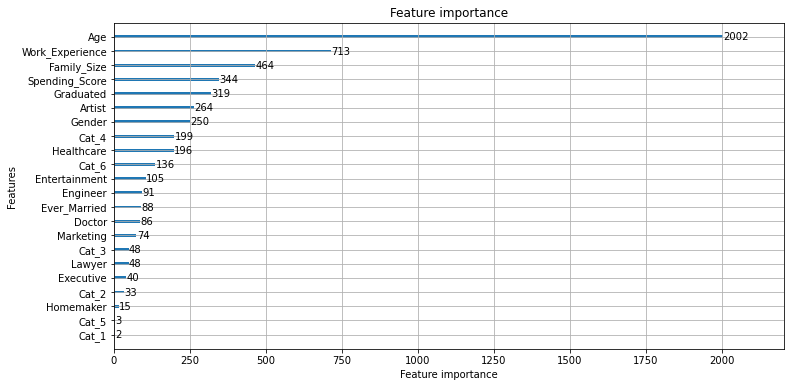

In [96]:
from lightgbm import plot_importance
plt.rcParams['figure.figsize'] = (12, 6)
plot_importance(clf)
plt.show()

In [150]:
sub = pd.read_csv('sample_submission.csv')

In [151]:
sub

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A
...,...,...
2622,467954,A
2623,467958,A
2624,467960,A
2625,467961,A


In [152]:
sub['Segmentation'] = clf.predict(test_df)

In [153]:
sub['Segmentation'] = sub['Segmentation'].map({0:"A" ,1:"B",2:"C",3:"D"})

In [154]:
sub

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,A
3,459000,A
4,459001,D
...,...,...
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,A


In [184]:
temp = sub.merge(commonIDlist,on='ID',how='outer')

In [185]:
temp

,ID,Segmentation_x,Segmentation_y
0,458989,A,B
1,458994,C,C
2,458996,A,A
3,459000,A,C
4,459001,D,C
...,...,...,...
2622,467954,D,D
2623,467958,A,A
2624,467960,A,NaN
2625,467961,A,B


In [191]:
sub['Segmentation'] = np.where(temp['Segmentation_y'].isna(),sub['Segmentation'],temp['Segmentation_y'])

In [192]:
sub

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C
...,...,...
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,B


In [193]:
sub.to_csv('output.csv',index=False)

In [194]:
df = pd.read_csv('output.csv')

In [195]:
df['Segmentation'].value_counts()

A    726
D    717
C    640
B    544
Name: Segmentation, dtype: int64